In [26]:
import pandas as pd
import numpy as np
import missingno as msno
import datetime
import matplotlib.pyplot as plt

In [17]:
def load_forces(forces):
    df_streets = dict()
    df_outcomes = dict()
    df_stop_and_search = dict()
    
    for force in forces:
        file_path_streets = './Data/force_data/' + force + '_street.csv'
        file_path_outcomes = './Data/force_data/' + force + '_outcomes.csv'
        file_path_stop_and_search = './Data/force_data/' + force + '_stop_and_search.csv'
        
        df_streets[force] = pd.read_csv(file_path_streets, low_memory=False)
        df_outcomes[force] = pd.read_csv(file_path_outcomes, low_memory=False)
        df_stop_and_search[force] = pd.read_csv(file_path_stop_and_search, low_memory=False)
    
    return df_streets, df_outcomes, df_stop_and_search

In [18]:
forces = ['city-of-london', 'metropolitan', 'surrey', 'hertfordshire', 'thames-valley', 'essex']
df_streets, df_outcomes, df_stop_and_search = load_forces(forces)

In [19]:
df_streets['city-of-london'].head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Vehicle crime,NaN,NaN
1,1,NaN,2010-12,City of London Police,City of London Police,-0.114940,51.518632,On or near Brownlow Street,E01000914,Camden 028B,Other crime,NaN,NaN
2,2,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Other crime,NaN,NaN
3,3,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Other crime,NaN,NaN
4,4,NaN,2010-12,City of London Police,City of London Police,-0.125742,51.516368,On or near Grape Street,E01000919,Camden 028D,Anti-social behaviour,NaN,NaN


In [7]:
df_stop_and_search['Datetime'] = pd.to_datetime(df_stop_and_search['Date'])
df_stop_and_search['Date'] = df_stop_and_search['Datetime'].dt.date

In [20]:
df_streets['metropolitan'].shape, df_outcomes['metropolitan'].shape, df_stop_and_search['metropolitan'].shape

((11625548, 13), (5820841, 11), (1310977, 16))

<AxesSubplot:>

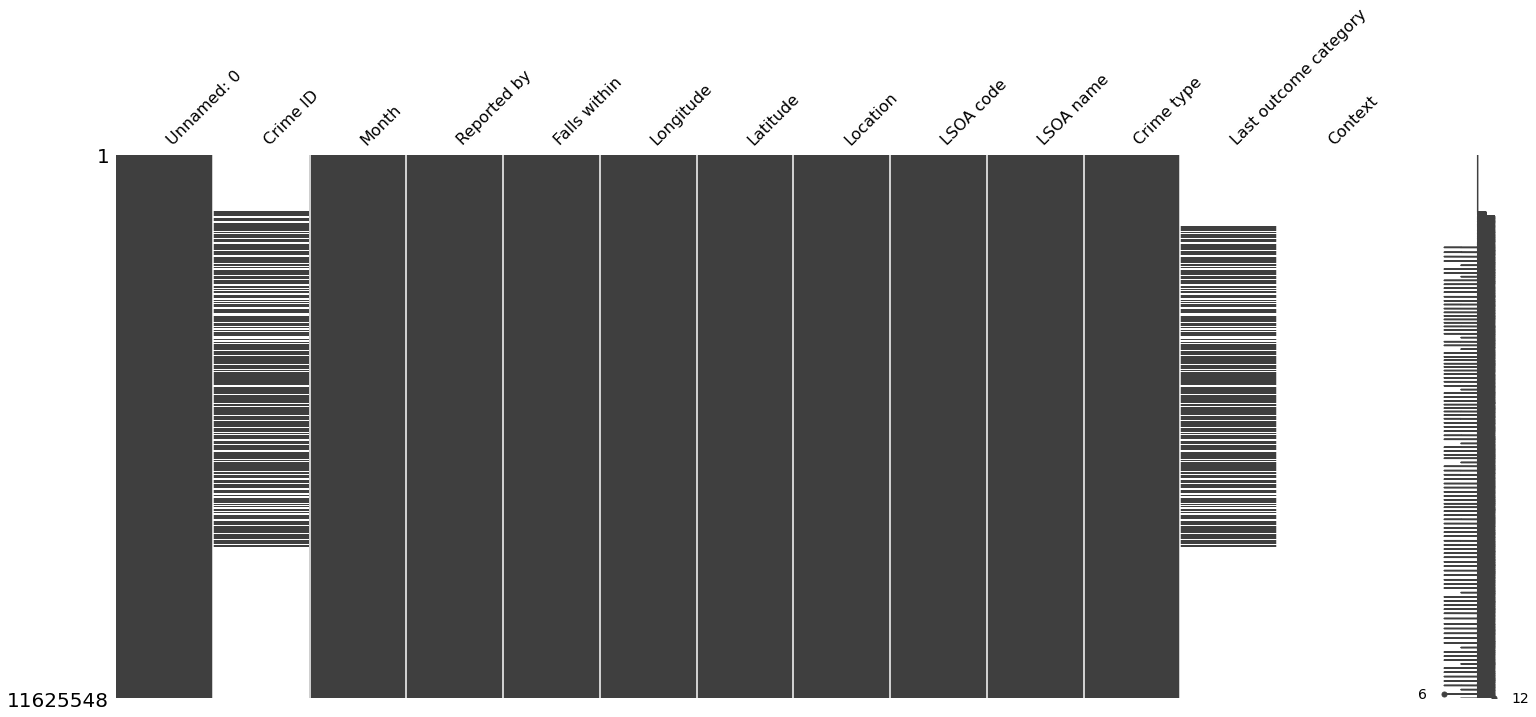

In [21]:
msno.matrix(df_streets['metropolitan'])

In [33]:
def plot_forces(df, forces=[]):
    df_months = dict()
    plt.figure(figsize=(16, 8), dpi=150)
    
    if forces == []:
        for key in df:
            df_months[key] = df[key]['Month'].value_counts()
            df_months[key].sort_index(inplace=True)
            df_months[key].plot(label=key)
    else:
        for force in forces:
            df_months[force] = df[force]['Month'].value_counts()
            df_months[force].sort_index(inplace=True)
            df_months[force].plot(label=force)

    plt.title('Number of incidents')
    plt.xlabel('Months')
    plt.legend()

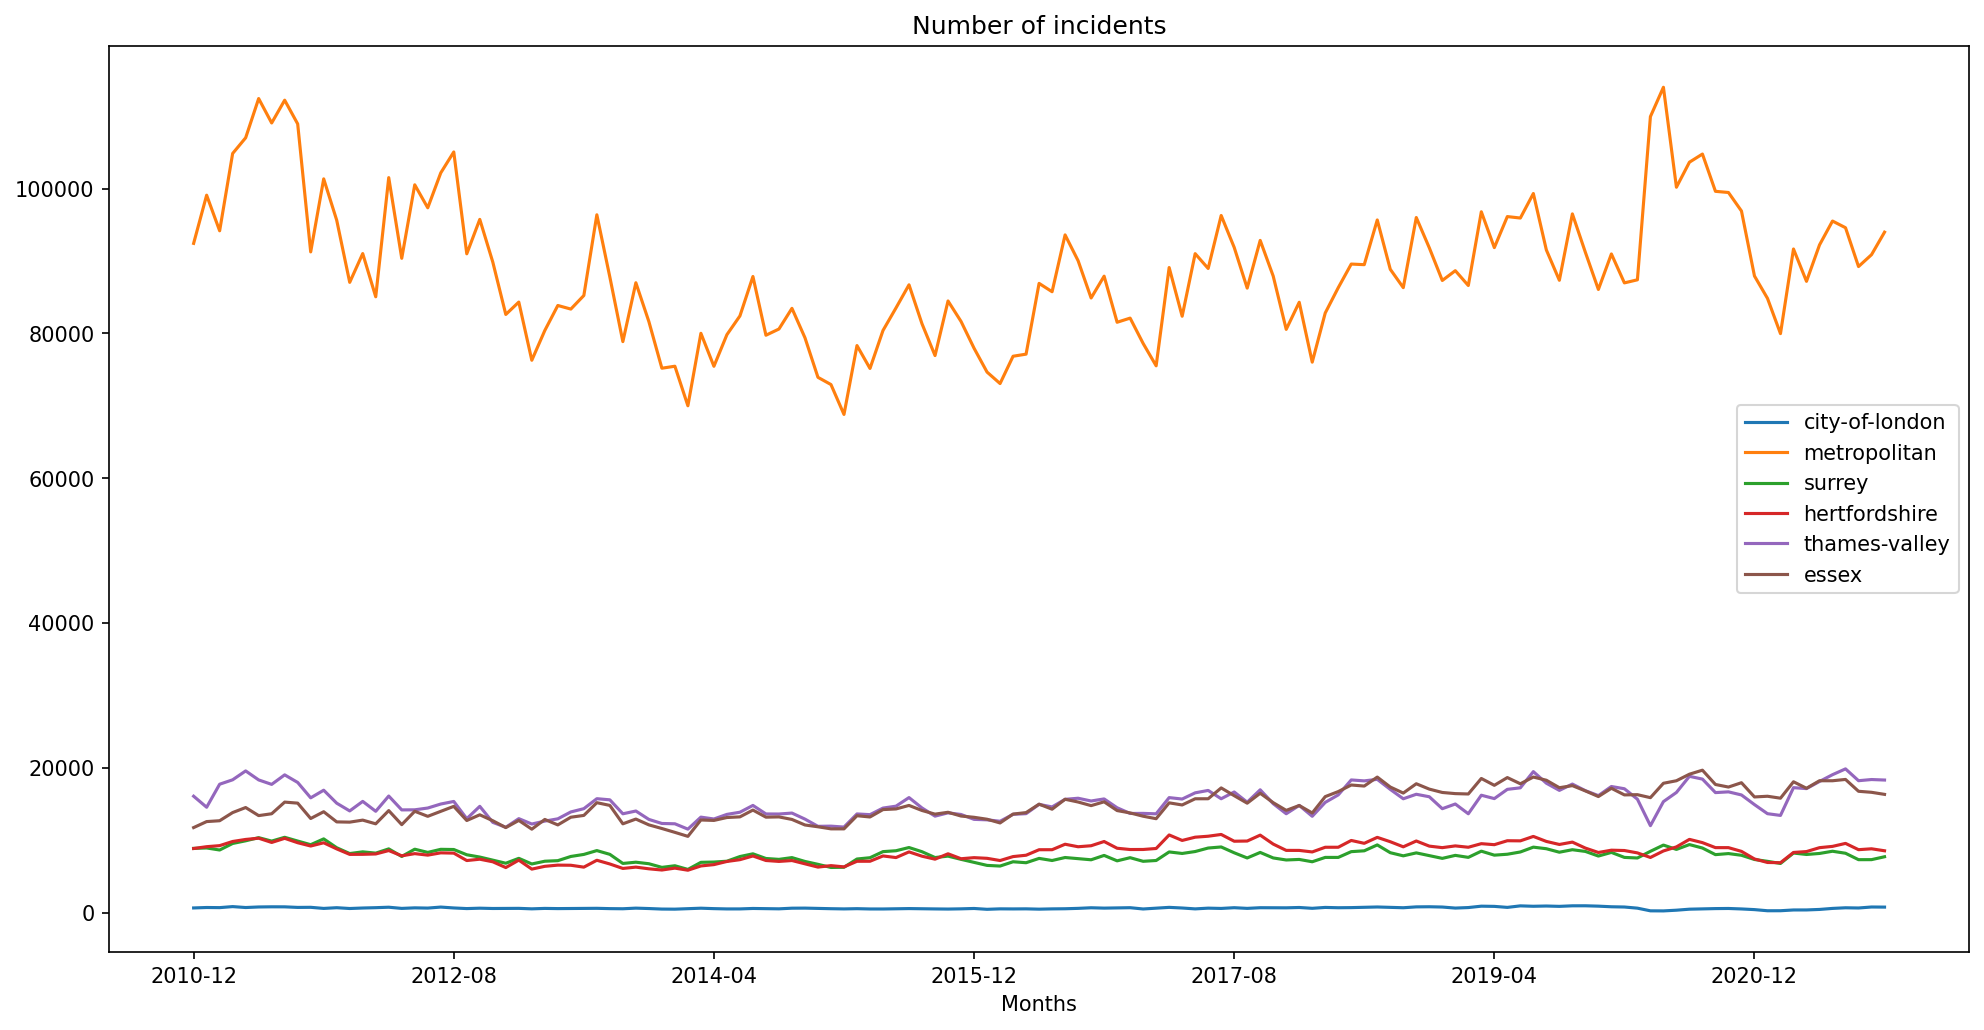

In [34]:
plot_forces(df_streets)

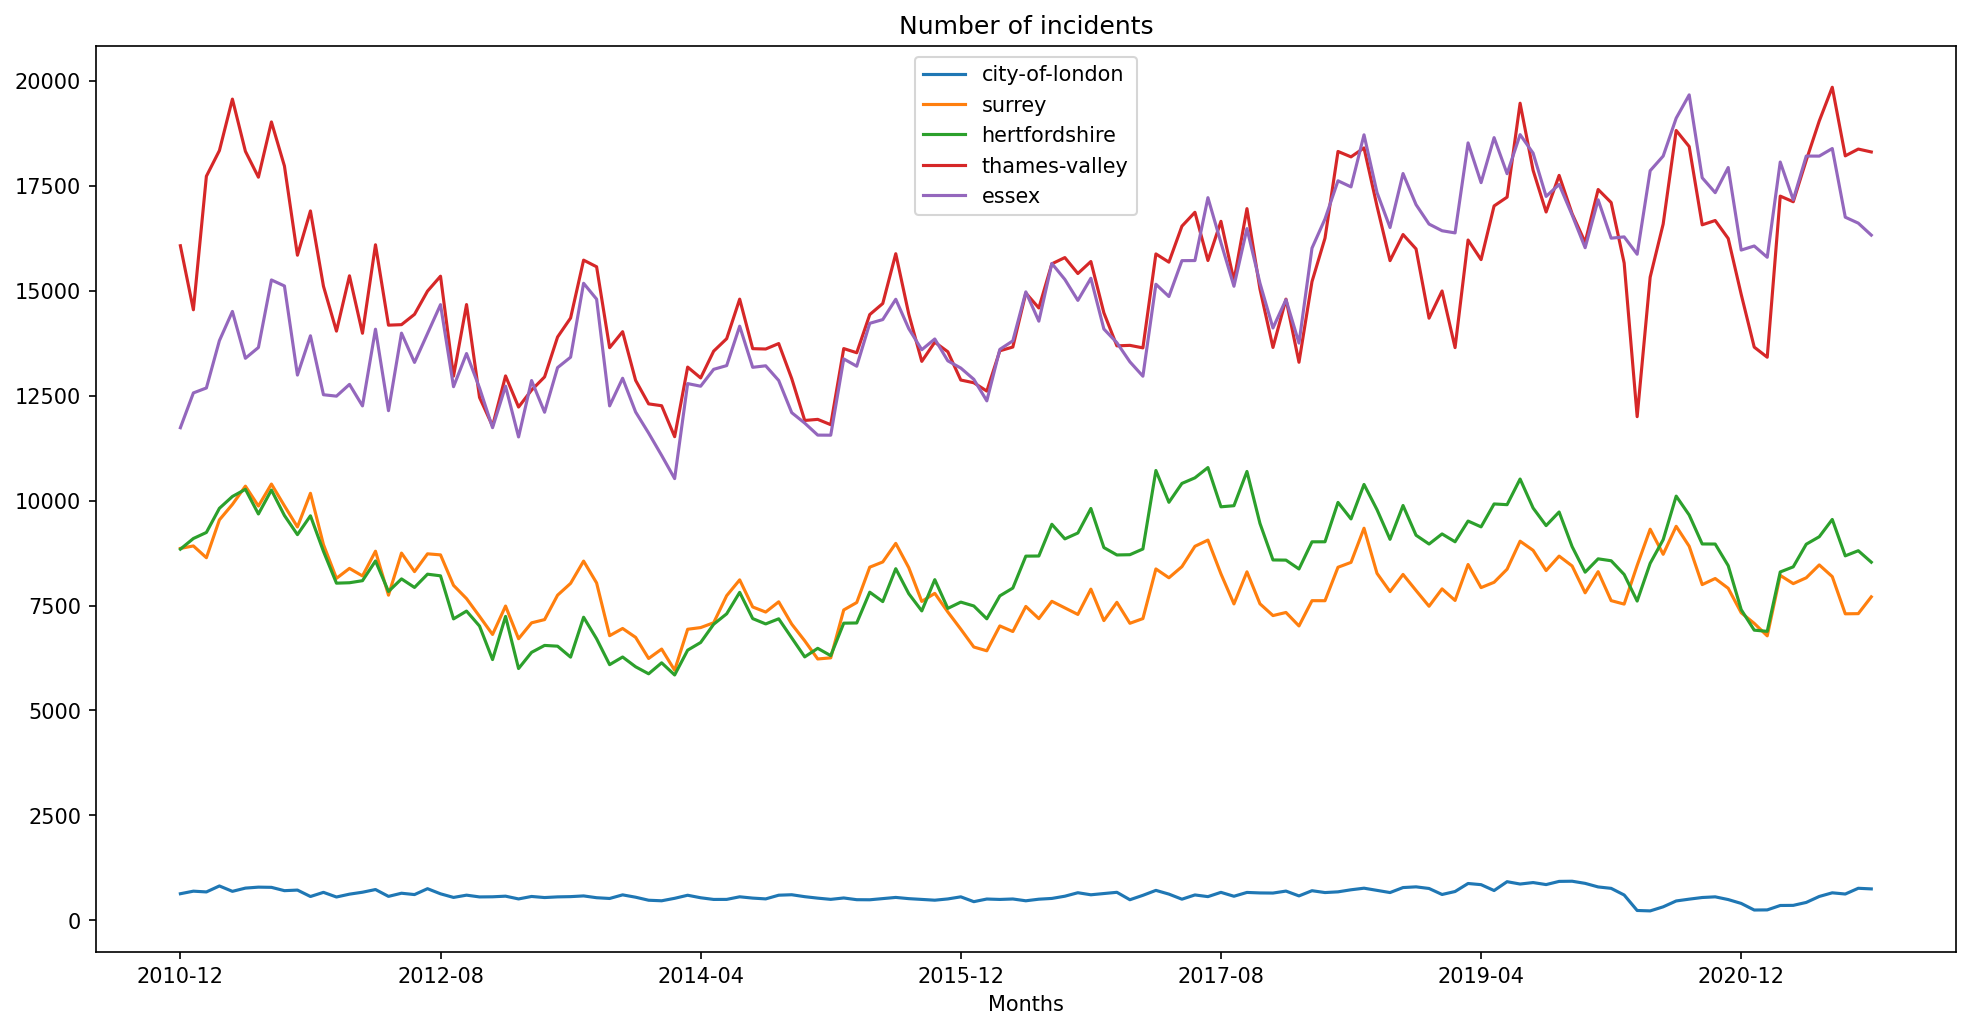

In [35]:
forces = ['city-of-london', 'surrey', 'hertfordshire', 'thames-valley', 'essex']
plot_forces(df_streets, forces)

<AxesSubplot:>

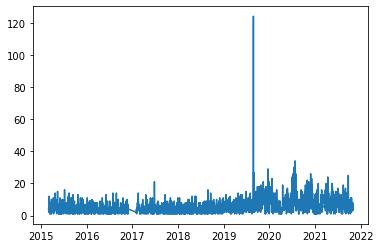

In [17]:
df_dates = df_stop_and_search['Date'].value_counts()
df_dates.sort_index(inplace=True)
df_dates.plot()

In [20]:
df_dates.sort_values()

2018-02-28      1
2018-08-01      1
2017-04-09      1
2017-04-10      1
2015-11-07      1
             ... 
2020-07-16     28
2019-12-21     29
2020-07-17     30
2020-07-25     34
2019-08-27    124
Name: Date, Length: 2200, dtype: int64

In [25]:
df_stop_and_search[df_stop_and_search['Date'] == datetime.date(year=2019,month=8,day=27)]

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Datetime
6287,148,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:00:12+00:00
6288,149,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:02:02+00:00
6289,150,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:03:12+00:00
6290,151,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:04:03+00:00
6291,152,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:08:15+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6406,267,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,2019-08-27 03:50:03+00:00
6407,268,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,2019-08-27 04:00:26+00:00
6408,269,Person search,2019-08-27,NaN,NaN,51.525845,-0.207409,Male,25-34,Asian/Asian British - Any other Asian background,Asian,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,Community resolution,True,False,2019-08-27 09:14:49+00:00
6409,270,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 11:56:19+00:00
